# Linear Regression From Scratch

This notebook implements Linear Regression from scratch using only NumPy, without using scikit-learn's LinearRegression model.

## Table of Contents
1. Import Libraries
2. Mathematical Foundation
3. Linear Regression Class Implementation
4. Generate Sample Data
5. Train the Model
6. Visualize Results
7. Model Evaluation

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 5)

## 2. Mathematical Foundation

### Linear Regression Model
The hypothesis function for linear regression is:

$$h_\theta(x) = \theta_0 + \theta_1 x$$

Where:
- $\theta_0$ is the bias (intercept)
- $\theta_1$ is the weight (slope)

### Cost Function (Mean Squared Error)
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

### Gradient Descent Update Rules
$$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$

$$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

Where:
- $m$ is the number of training examples
- $\alpha$ is the learning rate

## 3. Linear Regression Class Implementation

In [ ]:
class LinearRegressionScratch:
   
    
    def __init__(self, learning_rate: float = 0.01, n_iterations: int = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta0 = 0  # bias (intercept)
        self.theta1 = 0  # weight (slope)
        self.cost_history = []  # Track cost over iterations
        
    def _compute_cost(self, X: np.ndarray, y: np.ndarray) -> float:
        
        m = len(y)
        predictions = self.theta0 + self.theta1 * X
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        
        m = len(y)
        
        # Gradient descent
        for iteration in range(self.n_iterations):
            # Compute predictions
            predictions = self.theta0 + self.theta1 * X
            
            # Compute errors
            errors = predictions - y
            
            # Update parameters using gradient descent
            theta0_gradient = (1 / m) * np.sum(errors)
            theta1_gradient = (1 / m) * np.sum(errors * X)
            
            self.theta0 -= self.learning_rate * theta0_gradient
            self.theta1 -= self.learning_rate * theta1_gradient
            
            # Track cost
            cost = self._compute_cost(X, y)
            self.cost_history.append(cost)
            
            # Print progress every 100 iterations
            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.n_iterations} - Cost: {cost:.4f}")
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        
        return self.theta0 + self.theta1 * X
    
    def get_parameters(self) -> Tuple[float, float]:
        
        return self.theta0, self.theta1
    
    def r2_score(self, X: np.ndarray, y: np.ndarray) -> float:
        
        predictions = self.predict(X)
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

print("✓ LinearRegressionScratch class defined successfully!")

✓ LinearRegressionScratch class defined successfully!


## 4. Generate Sample Data

We'll create synthetic data with a linear relationship plus some noise.

Generated 100 data points
X shape: (100,)
y shape: (100,)

True parameters: intercept=3, slope=2


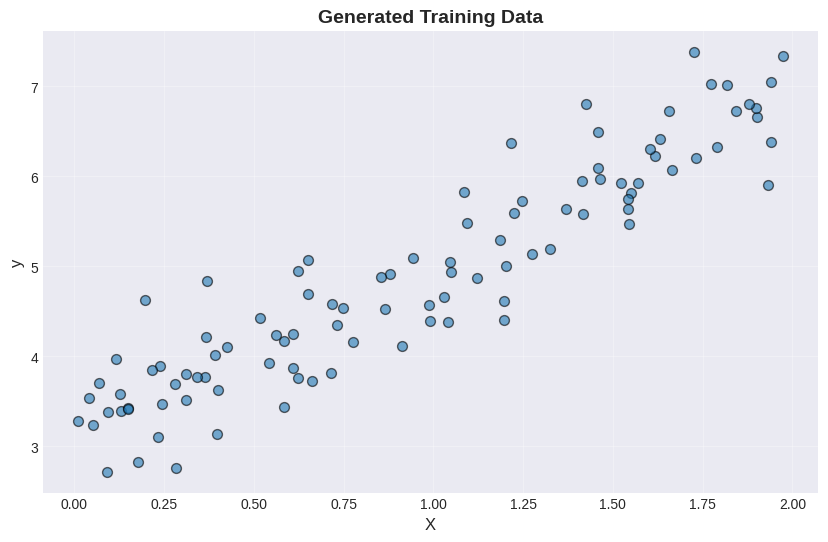

In [3]:
# Generate synthetic data
# True relationship: y = 3 + 2*x + noise

n_samples = 100
X = 2 * np.random.rand(n_samples)  # Random values between 0 and 2
y = 3 + 2 * X + np.random.randn(n_samples) * 0.5  # Linear relationship with noise

print(f"Generated {n_samples} data points")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTrue parameters: intercept=3, slope=2")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='k', s=50)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Generated Training Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Train the Model

In [4]:
# Create and train the model
model = LinearRegressionScratch(learning_rate=0.1, n_iterations=1000)

print("Training Linear Regression model...\n")
model.fit(X, y)

# Get learned parameters
theta0, theta1 = model.get_parameters()
print(f"\n{'='*50}")
print(f"Training Complete!")
print(f"{'='*50}")
print(f"Learned Parameters:")
print(f"  Intercept (θ₀): {theta0:.4f}")
print(f"  Slope (θ₁):     {theta1:.4f}")
print(f"\nTrue Parameters:")
print(f"  Intercept: 3.0000")
print(f"  Slope:     2.0000")
print(f"{'='*50}")

Training Linear Regression model...

Iteration 100/1000 - Cost: 0.1041
Iteration 200/1000 - Cost: 0.1009
Iteration 300/1000 - Cost: 0.1008
Iteration 400/1000 - Cost: 0.1008
Iteration 500/1000 - Cost: 0.1008
Iteration 600/1000 - Cost: 0.1008
Iteration 700/1000 - Cost: 0.1008
Iteration 800/1000 - Cost: 0.1008
Iteration 900/1000 - Cost: 0.1008
Iteration 1000/1000 - Cost: 0.1008

Training Complete!
Learned Parameters:
  Intercept (θ₀): 3.1075
  Slope (θ₁):     1.8851

True Parameters:
  Intercept: 3.0000
  Slope:     2.0000


## 6. Visualize Results

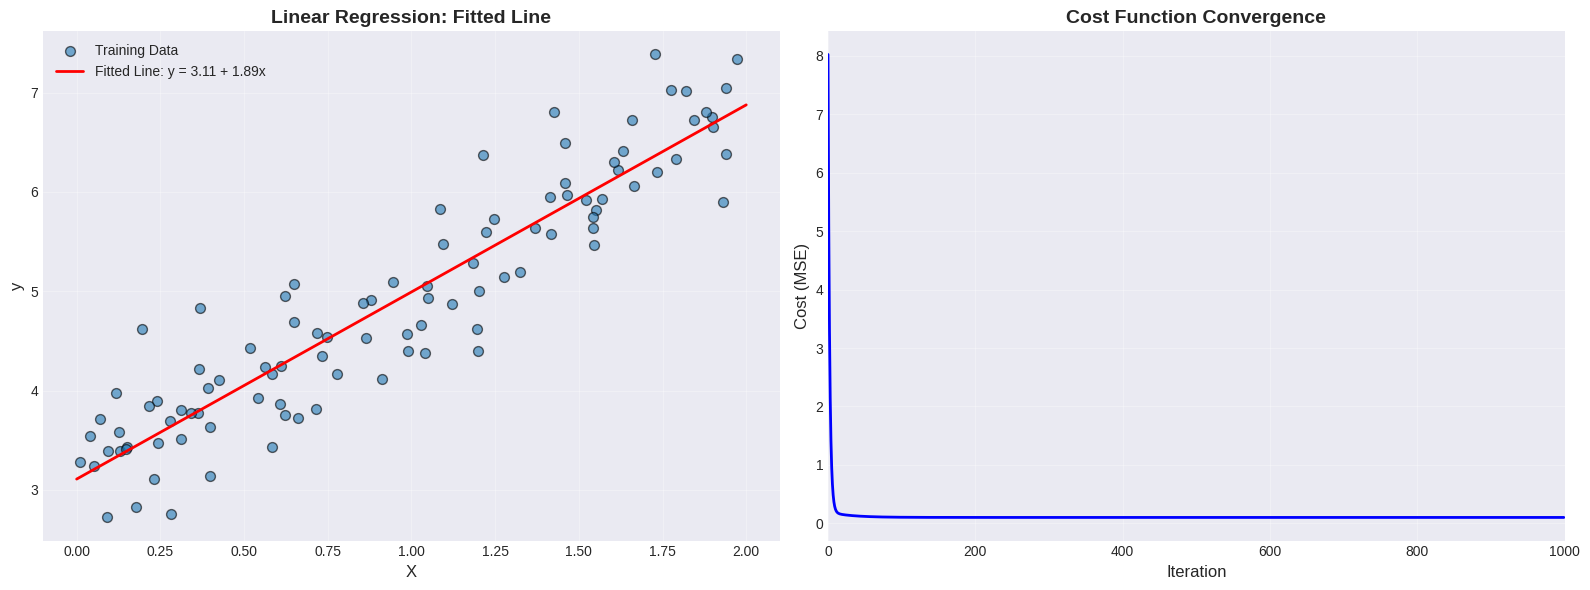

Final Cost: 0.1008


In [5]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Regression Line
ax1.scatter(X, y, alpha=0.6, edgecolors='k', s=50, label='Training Data')
X_line = np.linspace(0, 2, 100)
y_pred_line = model.predict(X_line)
ax1.plot(X_line, y_pred_line, 'r-', linewidth=2, label=f'Fitted Line: y = {theta0:.2f} + {theta1:.2f}x')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Linear Regression: Fitted Line', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Cost Function Convergence
ax2.plot(model.cost_history, linewidth=2, color='blue')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Cost (MSE)', fontsize=12)
ax2.set_title('Cost Function Convergence', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, len(model.cost_history))

plt.tight_layout()
plt.show()

print(f"Final Cost: {model.cost_history[-1]:.4f}")

## 7. Model Evaluation

In [6]:
# Calculate R² score
r2 = model.r2_score(X, y)

print(f"\n{'='*50}")
print(f"Model Evaluation")
print(f"{'='*50}")
print(f"R² Score: {r2:.4f}")
print(f"Final Cost (MSE): {model.cost_history[-1]:.4f}")
print(f"{'='*50}")

# Make some predictions
test_values = np.array([0.5, 1.0, 1.5])
predictions = model.predict(test_values)

print(f"\nSample Predictions:")
print(f"{'X':<10} {'Predicted y':<15} {'True y (approx)'}")
print(f"{'-'*45}")
for x_val, y_pred in zip(test_values, predictions):
    y_true = 3 + 2 * x_val  # True relationship without noise
    print(f"{x_val:<10.2f} {y_pred:<15.4f} {y_true:.4f}")


Model Evaluation
R² Score: 0.8606
Final Cost (MSE): 0.1008

Sample Predictions:
X          Predicted y     True y (approx)
---------------------------------------------
0.50       4.0501          4.0000
1.00       4.9926          5.0000
1.50       5.9351          6.0000


## 8. Comparison with Different Learning Rates (Optional)

Let's see how different learning rates affect convergence.

Iteration 100/500 - Cost: 8.4187
Iteration 200/500 - Cost: 5.6314
Iteration 300/500 - Cost: 3.7869
Iteration 400/500 - Cost: 2.5661
Iteration 500/500 - Cost: 1.7578
Iteration 100/500 - Cost: 0.3630
Iteration 200/500 - Cost: 0.1541
Iteration 300/500 - Cost: 0.1367
Iteration 400/500 - Cost: 0.1263
Iteration 500/500 - Cost: 0.1190
Iteration 100/500 - Cost: 0.1041
Iteration 200/500 - Cost: 0.1009
Iteration 300/500 - Cost: 0.1008
Iteration 400/500 - Cost: 0.1008
Iteration 500/500 - Cost: 0.1008
Iteration 100/500 - Cost: 0.1008
Iteration 200/500 - Cost: 0.1008
Iteration 300/500 - Cost: 0.1008
Iteration 400/500 - Cost: 0.1008
Iteration 500/500 - Cost: 0.1008


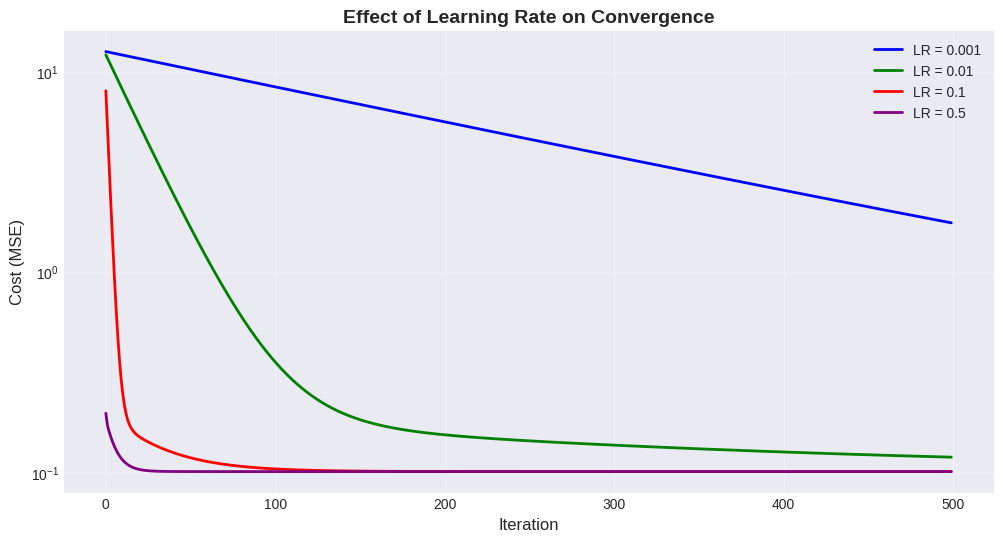


Observations:
- Too small learning rate (0.001): Slow convergence
- Optimal learning rate (0.1): Fast and stable convergence
- Too large learning rate (0.5): May oscillate or diverge


In [7]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(12, 6))

for lr, color in zip(learning_rates, colors):
    model_test = LinearRegressionScratch(learning_rate=lr, n_iterations=500)
    model_test.fit(X, y)
    plt.plot(model_test.cost_history, label=f'LR = {lr}', color=color, linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.title('Effect of Learning Rate on Convergence', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to see all curves clearly
plt.show()

print("\nObservations:")
print("- Too small learning rate (0.001): Slow convergence")
print("- Optimal learning rate (0.1): Fast and stable convergence")
print("- Too large learning rate (0.5): May oscillate or diverge")

## Summary

In this notebook, we:

1. ✅ Implemented Linear Regression from scratch using only NumPy
2. ✅ Used Gradient Descent for optimization
3. ✅ Visualized the regression line and cost convergence
4. ✅ Evaluated the model using R² score
5. ✅ Explored the effect of different learning rates

### Key Takeaways:

- Linear regression finds the best-fit line by minimizing the Mean Squared Error
- Gradient descent iteratively updates parameters to minimize the cost function
- Learning rate is crucial: too small = slow convergence, too large = instability
- R² score measures how well the model explains the variance in the data

### Next Steps:

- Extend to multiple features (Multiple Linear Regression)
- Implement regularization (Ridge, Lasso)
- Try on real-world datasets
- Compare with scikit-learn's implementation